# Spinnr Website Graphs
Steps for Updating the Website:
1. Open the Files tab on the left-hand side.
2. Upload the Main Analytics spreadsheet in the Files tab as an Excel file and make sure it is named exactly "Main Analytics Sheet.xlsx".
3. Upload the All Users spreadsheet as a CSV file and make sure it is named exactly "All Users.csv".
4. Upload the Coins Data spreadsheet as a CSV file and make sure it is named exactly "Coins Data.csv".
5. Go to "Runtime" and click "Run All"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from scipy import stats

In [ ]:
dict = pd.read_excel("Main Analytics Sheet.xlsx", sheet_name = None, index_col = 0)
if "Country" in dict.keys(): dict.pop("Country")
all_users = pd.read_csv("All Users.csv", index_col = 0)
coins_data = pd.read_csv("Coins Data.csv", index_col = 0)

In [ ]:
#create the times array
dates = [date(2023,9,7), date(2023,9,19), date(2023,10,5), date(2023,10,13), date(2023,10,20), date(2023,10,27), date(2023,11,3)]
numofdays_arr = [18, 12, 16, 8, 14, 7, 7]
#year variable increments by 1 when the time goes from december to january
year = 2023
to_month = 0
to_day = 0
from_month = 0
from_day = 0
to_date = date(2023,11,3)
for i in range(7, len(dict.keys())):
  int_count = 0
  for j in range(0, len(list(dict.keys())[i])):
    if list(dict.keys())[i][j].isnumeric():
      if int_count==0:
        from_month = list(dict.keys())[i][j:j+2]
      if int_count==2:
        from_day = list(dict.keys())[i][j:j+2]
      if int_count==4:
        if to_month == "12":
          if list(dict.keys())[i][j:j+2] == "01":
            year+=1
        to_month = list(dict.keys())[i][j:j+2]
      if int_count==6:
        to_day = list(dict.keys())[i][j:j+2]
      int_count+=1
  numofdays_arr.append((date(year, int(to_month), int(to_day)) - to_date).days)
  to_date = date(year, int(to_month), int(to_day))
  dates.append(to_date)





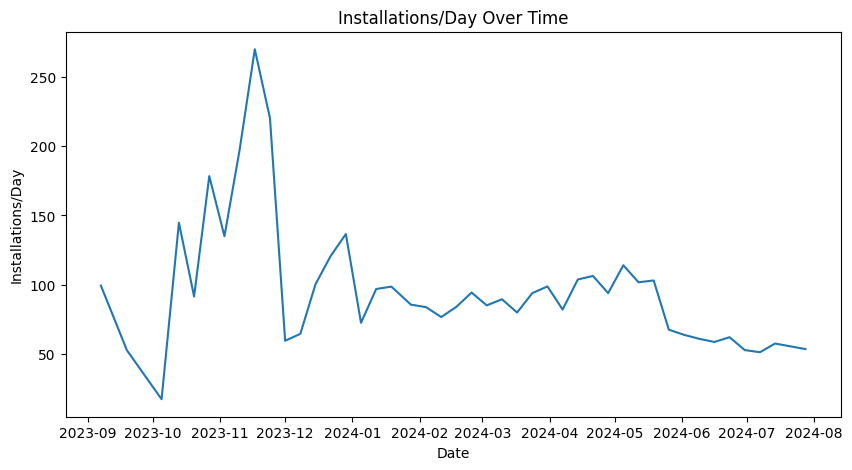

In [ ]:
#installations/day over time graph
installations = [dict[key]['Total']['Total Installs'] for key in dict.keys()]
installations = [installations[i]/numofdays_arr[i] for i in range(0,len(installations))]
plt.figure(figsize=(10, 5))
plt.title('Installations/Day Over Time')
plt.xlabel('Date')
plt.ylabel('Installations/Day')
plt.plot(dates, installations)


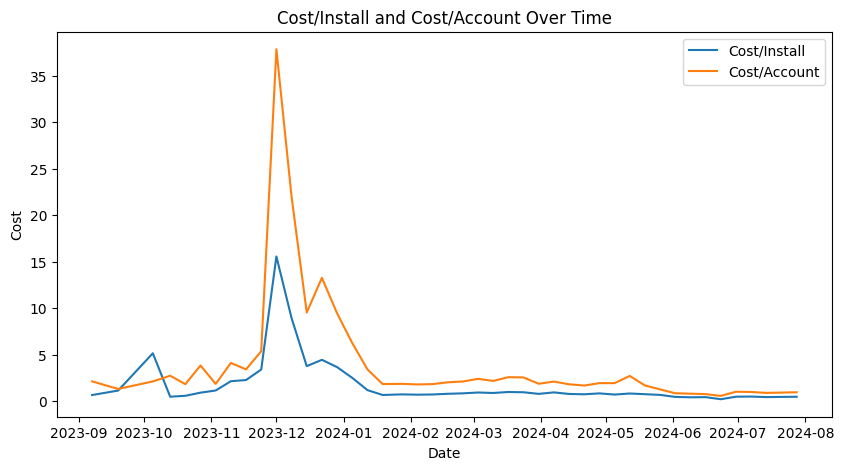

In [ ]:
#cost/install and cost/account
cost_per_install = [dict[key]['Cost']['Cost Per Install  '] for key in dict.keys()]
cost_per_account = [dict[key]['Cost']['Cost Per Account'] for key in dict.keys()]
plt.figure(figsize=(10, 5))
plt.title('Cost/Install and Cost/Account Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.plot(dates, cost_per_install, label="Cost/Install")
plt.plot(dates, cost_per_account, label="Cost/Account")
plt.legend()

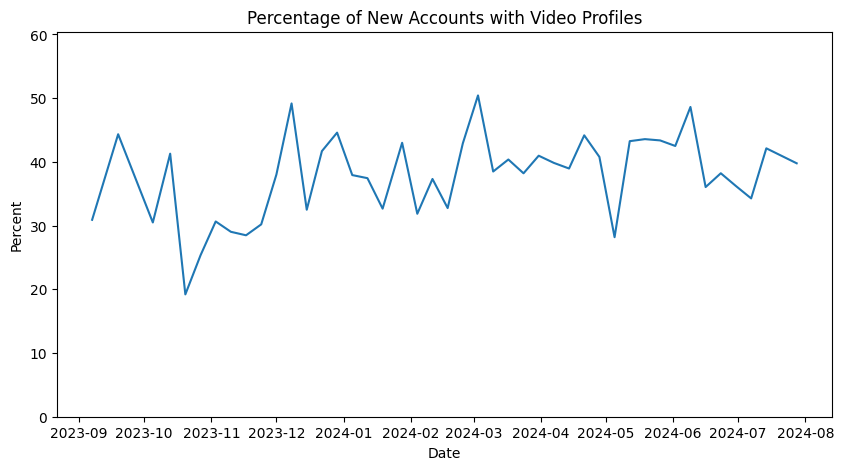

In [ ]:
#video profile % over time
accounts = [dict[key]['Total']['Total Accounts'] for key in dict.keys()]
vidprofiles = [dict[key]['Total']['Video Profiles'] for key in dict.keys()]
vidprofile_percent = [vidprofiles[i]/accounts[i]*100 for i in range(0, len(vidprofiles))]

plt.figure(figsize=(10, 5))
plt.title('Percentage of New Accounts with Video Profiles')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.ylim(0, max(vidprofile_percent)+10)
plt.plot(dates, vidprofile_percent)

Text(0.5, 1.0, 'Total Installs vs Cost (w/o outliers)')

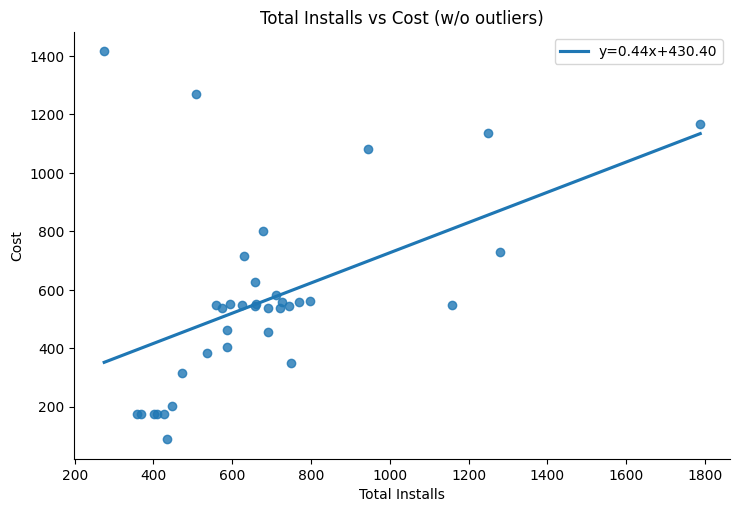

In [ ]:
#installs vs cost (w/o outliers)

total_installs = [dict[key]['Total']['Total Installs'] for key in dict.keys()]
costs = [dict[key]['Cost']['Cost Per Install Total Cost'] for key in dict.keys()]
installs_cost_df = pd.DataFrame({'Total Installs': total_installs, 'Cost': costs})
installs_cost_df = installs_cost_df[installs_cost_df['Cost'] < 2000]
res = stats.linregress(x=installs_cost_df['Cost'].to_numpy(), y=installs_cost_df['Total Installs'].to_numpy())
sns.lmplot(x='Total Installs', y='Cost', data=installs_cost_df, ci=0, height=5, aspect=1.5, line_kws={'label':"y={0:.2f}x+{1:.2f}".format(res.slope,res.intercept)})
plt.legend()
plt.title('Total Installs vs Cost (w/o outliers)')
# plt.xlabel('Total Installs')

Text(0.5, 1.0, 'Total Accounts vs Cost (w/o outliers)')

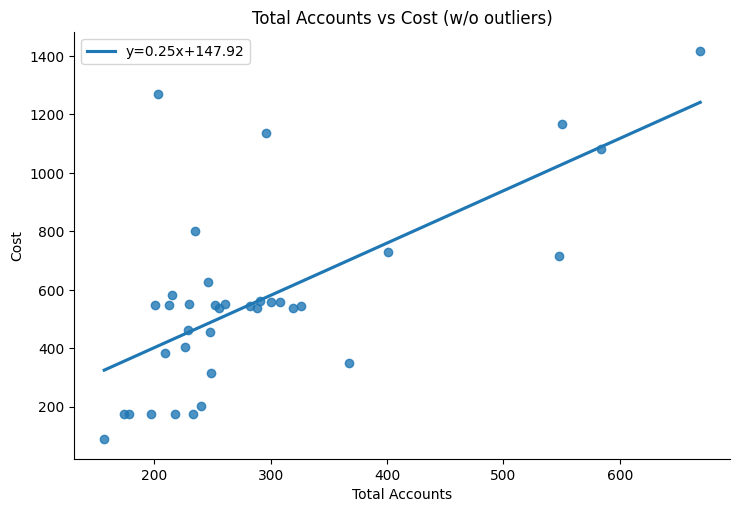

In [ ]:
#accounts vs cost (w/o outliers)

total_accounts = [dict[key]['Total']['Total Accounts'] for key in dict.keys()]
accounts_cost_df = pd.DataFrame({'Total Accounts': total_accounts, 'Cost': costs})
accounts_cost_df = accounts_cost_df[accounts_cost_df['Cost'] < 2000]
res2 = stats.linregress(x=accounts_cost_df['Cost'].to_numpy(), y=accounts_cost_df['Total Accounts'].to_numpy())
sns.lmplot(x='Total Accounts', y='Cost', data=accounts_cost_df, ci=0, height=5, aspect=1.5, line_kws={'label':"y={0:.2f}x+{1:.2f}".format(res2.slope,res2.intercept)})
plt.legend()
plt.title('Total Accounts vs Cost (w/o outliers)')
# plt.xlabel('Total Installs')

(array([3.250e+03, 9.980e+02, 8.400e+02, 8.010e+02, 9.160e+02, 9.610e+02,
        7.680e+02, 6.280e+02, 1.136e+03, 6.550e+02, 5.200e+02, 4.760e+02,
        4.850e+02, 4.610e+02, 4.700e+02, 5.030e+02, 4.060e+02, 3.730e+02,
        3.580e+02, 3.390e+02, 3.090e+02, 2.740e+02, 2.510e+02, 2.180e+02,
        2.260e+02, 2.690e+02, 2.200e+02, 1.410e+02, 1.610e+02, 1.200e+02,
        1.190e+02, 1.030e+02, 1.010e+02, 1.040e+02, 8.200e+01, 8.300e+01,
        6.800e+01, 7.200e+01, 5.900e+01, 6.300e+01, 5.200e+01, 4.700e+01,
        3.500e+01, 3.600e+01, 3.100e+01, 2.500e+01, 1.900e+01, 2.700e+01,
        1.400e+01, 1.400e+01, 1.200e+01, 8.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 8.000e+00, 5.000e+00, 3.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+0

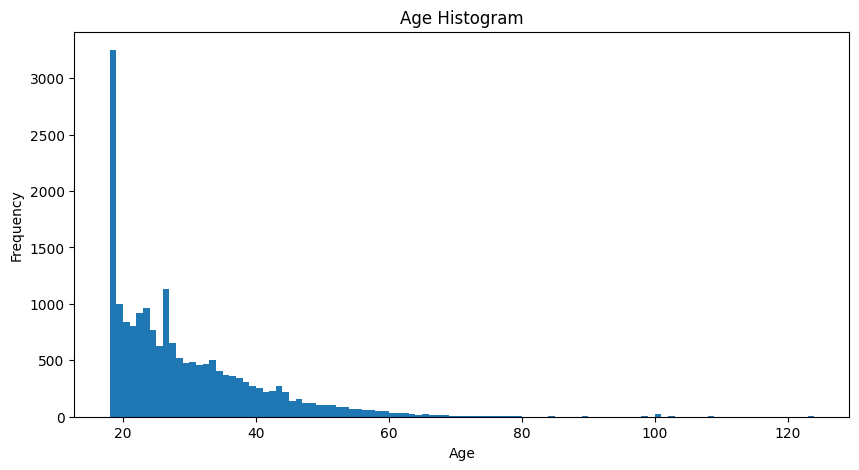

In [ ]:
# age histogram
agefiltered_df = all_users[all_users['Age'] > 0]
age_data = agefiltered_df['Age'].to_numpy()
plt.figure(figsize=(10, 5))
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(age_data, bins=range(int(min(age_data)), int(max(age_data)+1), 1))


<ipython-input-74-ec16ab6e3d64>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coins_percentages = [sorted_data[i]/coins_data.sum()[0]*100 for i in range(0, len(sorted_data))]


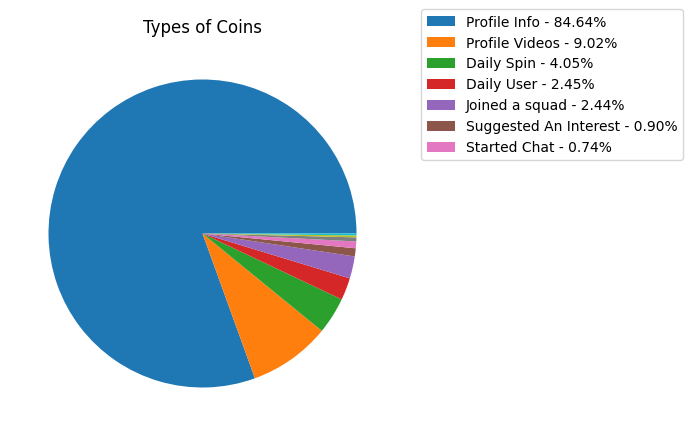

In [ ]:
#coins chart
sorted_data = coins_data.sum()[1:].sort_values(ascending=False)
coins_percentages = [sorted_data[i]/coins_data.sum()[0]*100 for i in range(0, len(sorted_data))]
coins_labels = [(sorted_data.index[i] + " - " + "{:.2f}".format(coins_percentages[i]) + "%") for i in range(0,7)]
plt.figure(figsize=(10, 5))
plt.title('Types of Coins')
patches = plt.pie(sorted_data)
plt.legend(coins_labels, loc='upper left', bbox_to_anchor=(1.05, 1.1))

Text(0.5, 1.0, 'States')

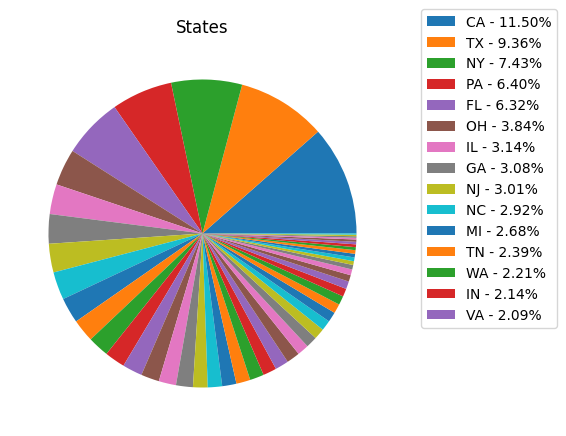

In [ ]:
#state counts
state_counts = all_users['State'].value_counts()
abbs = []
states = []
abbreviation_to_name = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming"
}
for a in abbreviation_to_name:
  count = 0
  count += state_counts.loc[a] + state_counts.loc[abbreviation_to_name[a]]
  states.append(count)
  abbs.append(a)

states_df = pd.DataFrame({'State': abbs, 'Count':states})
states_df = states_df.sort_values('Count', ascending=False)
state_percentages = [states_df['Count'].iloc[i]/states_df['Count'].sum()*100 for i in range(0, len(states_df['Count']))]
states_labels = [(states_df['State'].iloc[i] + " - " + "{:.2f}".format(state_percentages[i]) + "%") for i in range(0,15)]
plt.figure(figsize=(10, 5))
plt.pie(states_df['Count'])
plt.legend(states_labels, loc='upper left', bbox_to_anchor=(1.05, 1.1))
plt.title('States')
# state_counts.iloc[50:100]

In [ ]:

# Create filtered_all_users df
filtered_all_users = all_users
filtered_all_users['Created Date'] = pd.to_datetime(all_users['Created Date'])
filtered_all_users = filtered_all_users.sort_values('Created Date')
filtered_all_users = filtered_all_users.iloc[190:]
filtered_all_users = filtered_all_users[filtered_all_users['Coins']<50]
created_dates = filtered_all_users['Created Date']
months = []

<ipython-input-84-8704b37b25cb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum = filtered_all_users['Coins'][0]
<ipython-input-84-8704b37b25cb>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if str((created_dates)[i])[:7] != str((created_dates)[i-1])[:7]:
<ipython-input-84-8704b37b25cb>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  months.append((created_dates)[i-1])
<ipython-input-84-8704b37b25cb>:17: FutureWarning: Seri

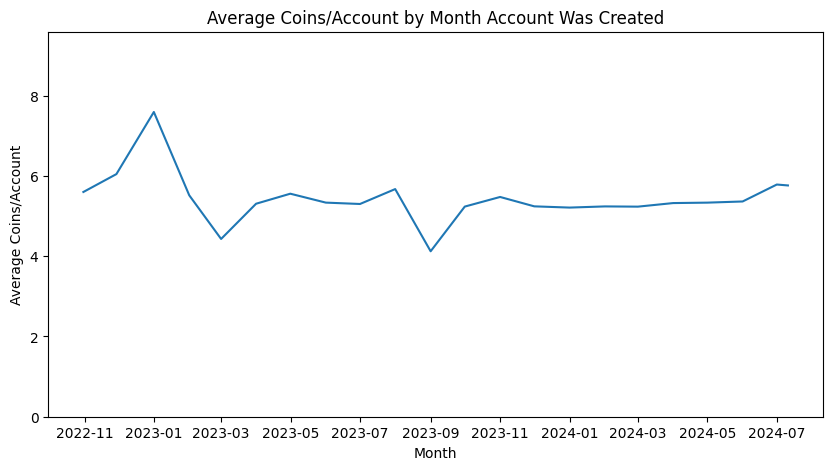

In [ ]:
# Average Coins/Account by Month Account Was Created
avg_coins = []
months = []
sum = filtered_all_users['Coins'][0]
count = 1
for i in range(1, len(filtered_all_users)):
  if str((created_dates)[i])[:7] != str((created_dates)[i-1])[:7]:
    avg_coins.append(sum/count)
    months.append((created_dates)[i-1])
    # print(i)
    sum = filtered_all_users['Coins'].iloc[i]
    count = 1
  else:
    sum += filtered_all_users['Coins'].iloc[i]
    count+=1
avg_coins.append(sum/count)
months.append((created_dates)[i])


plt.figure(figsize=(10, 5))
plt.title('Average Coins/Account by Month Account Was Created')
plt.xlabel('Month')
plt.ylabel('Average Coins/Account')
plt.ylim(0, max(avg_coins)+2)
plt.plot(months, avg_coins)

<ipython-input-85-514da6f5324f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum = filtered_all_users['Coins'][0]
<ipython-input-85-514da6f5324f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if str((created_dates)[i])[:7] != str((created_dates)[i-1])[:7]:
<ipython-input-85-514da6f5324f>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  months.append((created_dates)[i-1])


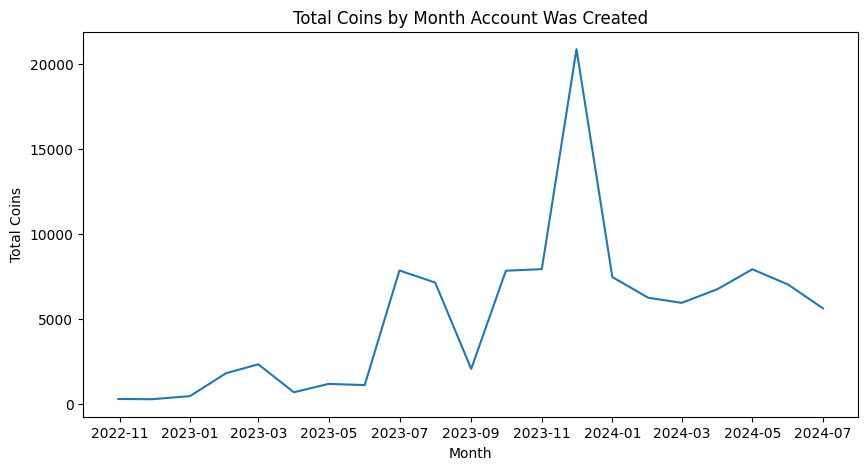

In [ ]:
# Total Coins by Month Account Was Created
total_coins = []
months = []
sum = filtered_all_users['Coins'][0]
count = 1
for i in range(1, len(filtered_all_users)):
  if str((created_dates)[i])[:7] != str((created_dates)[i-1])[:7]:
    total_coins.append(sum)
    months.append((created_dates)[i-1])
    # print(i)
    sum = filtered_all_users['Coins'].iloc[i]
    count = 1
  else:
    sum += filtered_all_users['Coins'].iloc[i]
    count+=1
plt.figure(figsize=(10, 5))
plt.title('Total Coins by Month Account Was Created')
plt.xlabel('Month')
plt.ylabel('Total Coins')
# plt.ylim(0, max(total_coins)+2)
plt.plot(months, total_coins)